# Assigment 2: CAMSHIFT
## Paper
Lies das Paper "Bradski_etal_1998_camshift.pdf" im KVV (unter "Resources"). 

## Histogramm berechnen
* Implementiere eine Funktion, die ein Farbhistogramm erstellt. Übergebe entweder ein Bild und ein ROI, oder das dem ROI unterliegende Bild. 
* Hierzu ermögliche durch die Übergabe eines zweiten (bzw. dritten) Parameters die Zusammenfassung von Farbwerten in n Bins. 
* Lade das Bild "images/racecar.png" und konvertiere das Bild in den HSV-Farbraum. Plotte den Hue-Kanal. (**RESULT**)

<Container object of 20 artists>

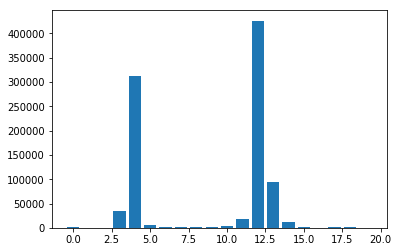

In [62]:
# dieser Code wurde als Musterlösung von Tobias Schülke zur Verfügung gestellt und von Tim renoviert

%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')

import plotly.plotly as py


IMAGES_PER_ROW = 4

MIN_SATURATION_CAR = 0.2
MIN_VALUE_CAR = 0.5
MIN_SATURATION_TACO = 0.8
MIN_VALUE_TACO = 0.2

ROI_FRAME_MARGIN_CAR = 60
ROI_FRAME_MARGIN_TACO = 20


image = io.imread('images/racecar.png')
imageCar = image[260:350, 480:640]

#fig = plt.figure(figsize=(15, 10))
#ax1 = plt.subplot(1, 2, 1)
#ax2 = plt.subplot(1, 2, 2)
# ...

#ax1.imshow(image)
#ax2.imshow(imageCar)

# ...
binCount = 20

def createColorHistogram(img, out = plt):
    global binCount
    histogram = [0] * binCount
    img_hsv = color.rgb2hsv(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[int((img_hsv[i,j,0])*binCount)] +=1
    
    return(histogram)
    
hist = createColorHistogram(image)
plt.bar(range(len(hist)),hist)


* stelle das Histogramm über dem Hue-Kanal für das gesamte Bild und für den Ausschnitt (x,y) = (480, 260) bis (640, 350) dar. Variiere auch mal testweise die Zahl der Bins(**RESULT**)


<Container object of 20 artists>

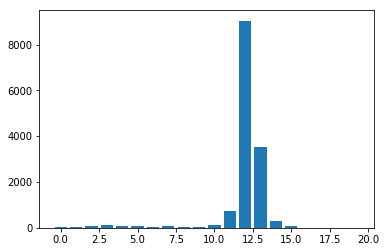

In [63]:
hist = createColorHistogram(imageCar)
plt.bar(range(len(hist)),hist)

## Wahrscheinlichkeitsverteilung
* implementiere die Methode aus der Vorlesung, die Dir - gegeben ein Hue-Histogramm - die Objekt-Wahrscheinlichkeitsverteilung für ein neues Bild berechnet. 
* erzeuge das Histogramm des Autos aus dem Bild "racecar.png" und wende die neue Funktion auf das letzte frame des Videos (images/racecar/151.jpg) an (**RESULT**)

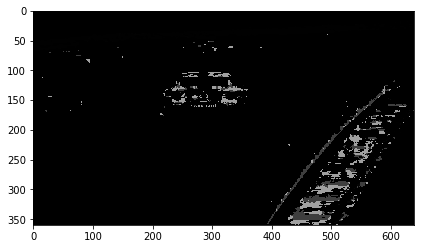

In [64]:
# Tip: in der Nacht sind alle Katzen grau ;)

        
def createProbDistribution(img, objectHist, binCount, minSaturation, minValue):
   
    #whkeit 
    verhaeltnisse = [0] * binCount
    amountOfPixels = 14400
    #whk_bild = color.hsv2rgb(np.copy(img))
    whk_bild = np.copy(img)
    img = color.rgb2hsv(img)
    
    for i in range(len(objectHist)):
        verhaeltnisse[i] = float(objectHist[i])/amountOfPixels
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if((img[i][j][1] < minSaturation) or (img[i][j][2] < minValue)):
                whk_bild[i][j][0] = 0
                whk_bild[i][j][1] = 0
                whk_bild[i][j][2] = 0
            else:
                #print(whk_bild[i][j][1])
                x = verhaeltnisse[int((img[i,j,0])*binCount)]
                whk_bild[i][j][0] = 255*x
                whk_bild[i][j][1] = 255*x
                whk_bild[i][j][2] = 255*x
                    
    return(whk_bild)
    #print(histogram)
    #print(verhaeltnisse)
    
    
    
lastFrame = io.imread('images/racecar/151.jpeg')
histogramCar = createColorHistogram(imageCar)
# histogramCar = createColorHistogram(imageCar, nbins, ax1)
# probDistr = createProbDistribution(lastFrame, histogramCar, nbins, MIN_SATURATION_CAR, MIN_VALUE_CAR)
probDistr = createProbDistribution(lastFrame, histogramCar, binCount, MIN_SATURATION_CAR, MIN_VALUE_CAR)
io.imshow(probDistr)

### ROI auf Bild anzeigen


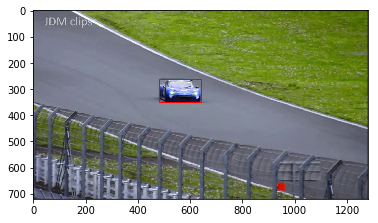

In [58]:
def drawROI(image, x, y, width, height, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    
    out.imshow(image)

drawROI(image, 480, 260, 160, 90)

##  Exercise 1.2 - Mean Shift
* Implementiere die Verschiebung und des ROI wie in der Vorlesung beschrieben. Teste den Algorithmus auf den Bildfolgen "images/racecar/*.jpg" oder "images/taco/*.jpg". Wähle das Tracking-Fenster geeignet (zur Reduktion der Dateigröße habe ich die Bilder um Faktor 2 verkleinert, d.h. die ROI von oben muss entsprechend angepasst werden). 
* Zeichne als Ausgabe die Trajektorie (die Bewegungsspur) der Objekte, wie durch CAMSHIFT zurückgegeben. (**RESULT**)

In [ ]:
#TODO Theorie: ROI definieren, gucken wo Zentroid auf dem createProbDistribution image und dann ROI verschieben

##  Exercise 1.2 - CAMSHIFT
* erweitere Deinen Algorithmus um die Anpassung der Größe des ROI und das Finden der Objektorientierung
* führe den Algorithmus wieder auf eine der Bildfolgen aus und zeichne eine Ellipse auf das Bild, die die gefundenen Parameter repräsentiert (**RESULT**)